# Abalone data set
Taken from the UCI Machine learning repository, this data set contains data of abalones (a marine snails) and can be used to predict the age of the abolone from physical measurements. The age is represented by the number of rings.

The data comes from this study: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait",
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).

From the UCI machine learning site we get the attribute information:

Name / Data Type / Measurement Unit / Description \
Sex / nominal / -- / M, F, and I (infant) \
Length / continuous / mm / Longest shell measurement \
Diameter / continuous / mm / perpendicular to length \
Height / continuous / mm / with meat in shell \
Whole weight / continuous / grams / whole abalone \
Shucked weight / continuous / grams / weight of meat \
Viscera weight / continuous / grams / gut weight (after bleeding) \
Shell weight / continuous / grams / after being dried \
Rings / integer / -- / +1.5 gives the age in years \

In [106]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# loading the data set
headernames = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", 
               "Shell weight", "Rings"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", names = headernames)

In [108]:
# first look at the data - first 5 entries
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [109]:
# sampling 5 entries
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1652,M,0.595,0.450,0.140,0.8380,0.3965,0.194,0.217,10
3158,M,0.550,0.435,0.110,0.8060,0.3415,0.203,0.215,9
3855,M,0.410,0.335,0.115,0.4405,0.1900,0.085,0.135,8
3017,I,0.435,0.325,0.105,0.3350,0.1360,0.065,0.115,8
269,F,0.450,0.360,0.125,0.4995,0.2035,0.100,0.170,13


In [110]:
# some basic statistics on the numerical variables 
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [111]:
# for the categorical variable
df.describe(include='object')

,Sex
count,4177
unique,3
top,M
freq,1528


In [112]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

We can see from looking at the a few rows and from the describe method that we have 9 variables, where 8 of them are quantitative and the last, the sex of the abolone, is categorical. There are 4177 entries.


## Visualizing the data

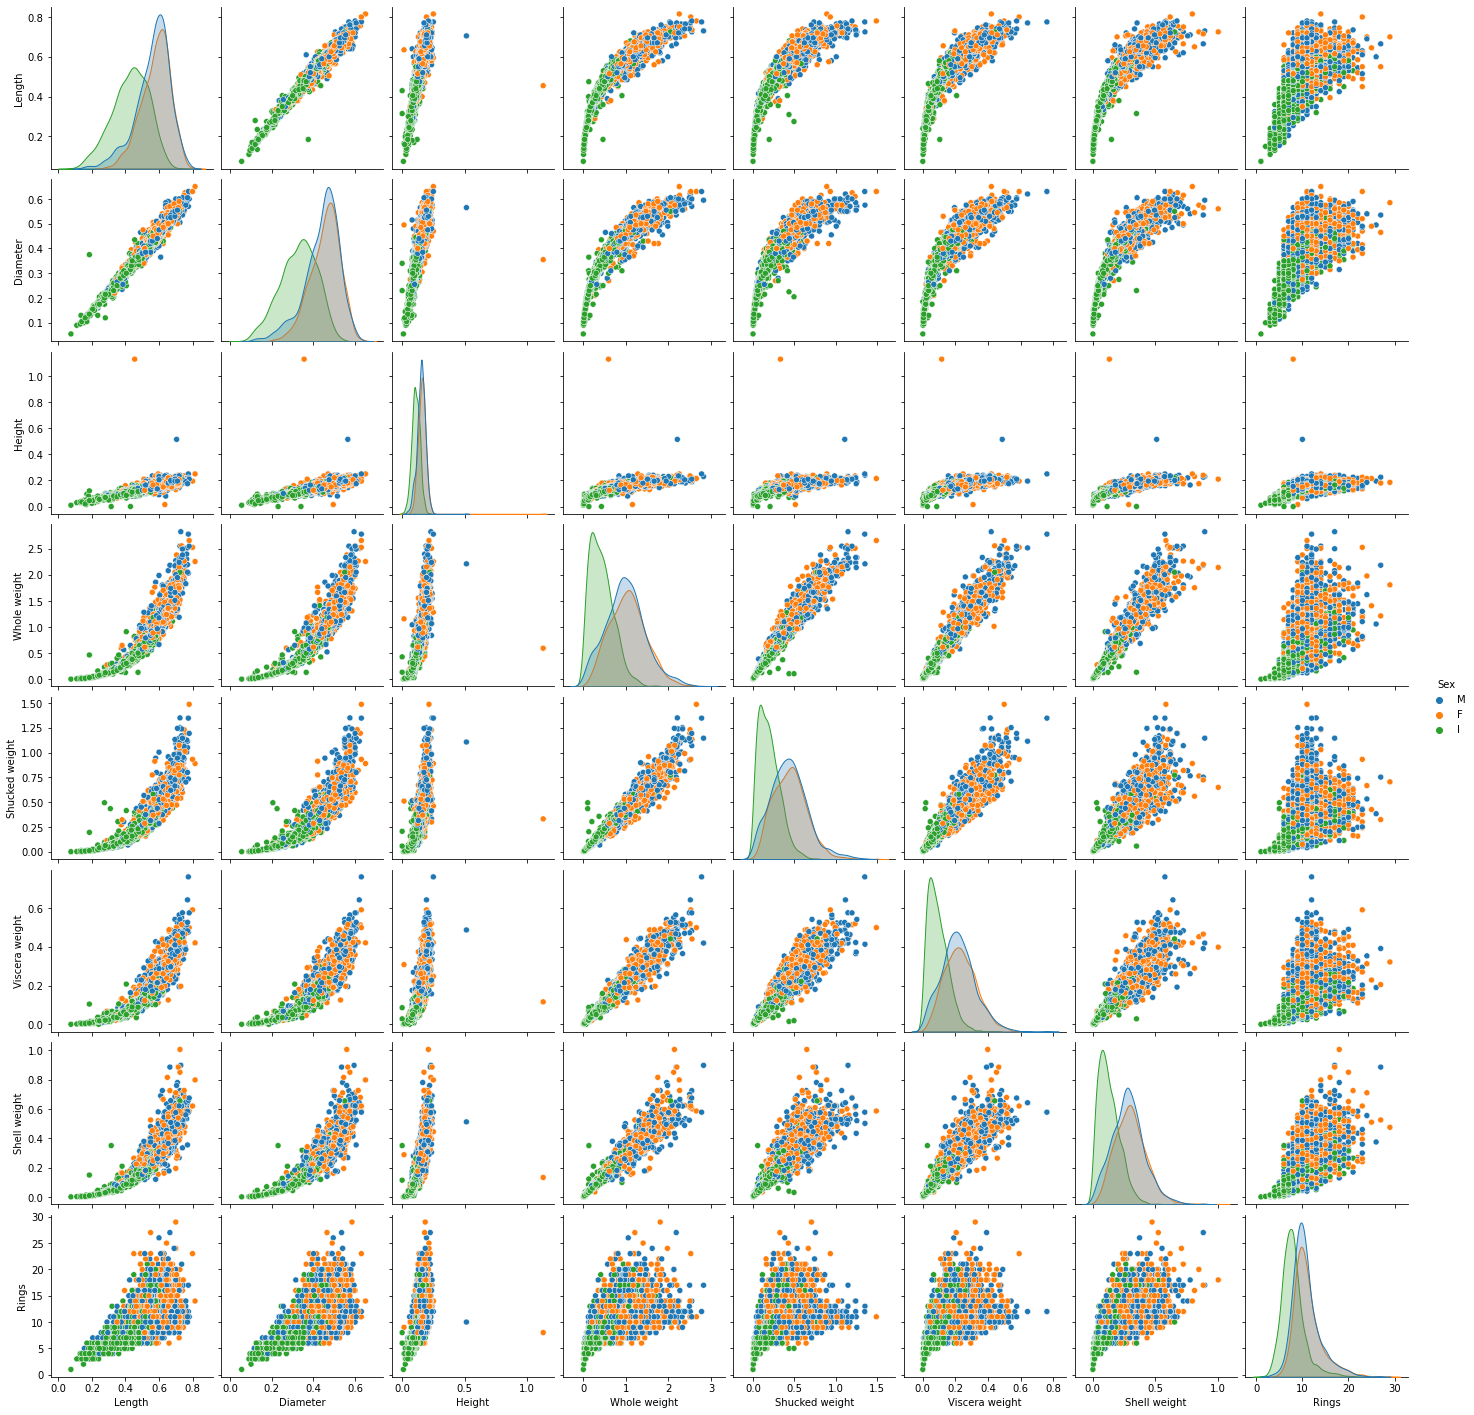

In [113]:
sns.pairplot(df, hue='Sex')

## Discussion on extreme outliers in height
From the pairplot we can see that when it comes to the height variable there are two outliers with a significant higher height than the rest. These are the blue and orange points. Most of the abalones have a height around 0.2 mm while the blue point is at about 0.5mm and the orange is above 1 mm. These might have a large impact on the end model, especially the orange point.

Looking at a boxplot of the height the two extreme outliers become even more visible

<AxesSubplot:xlabel='Height'>

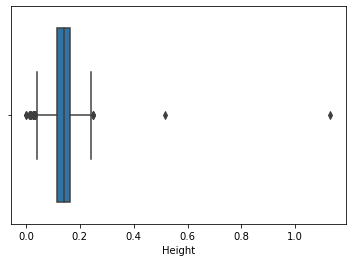

In [114]:
sns.boxplot(x=df["Height"])

Making a temperary datefram without the two extreme outliers lets us visualize the data without them.

<AxesSubplot:xlabel='Height'>

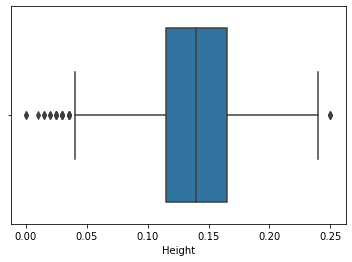

In [115]:
index_max_height = df["Height"].idxmax() 
tempdf = df.drop(index = index_max_height)
index_max_height2 = tempdf["Height"].idxmax()
tempdf = tempdf.drop(index = index_max_height2)
sns.boxplot(x=tempdf["Height"])

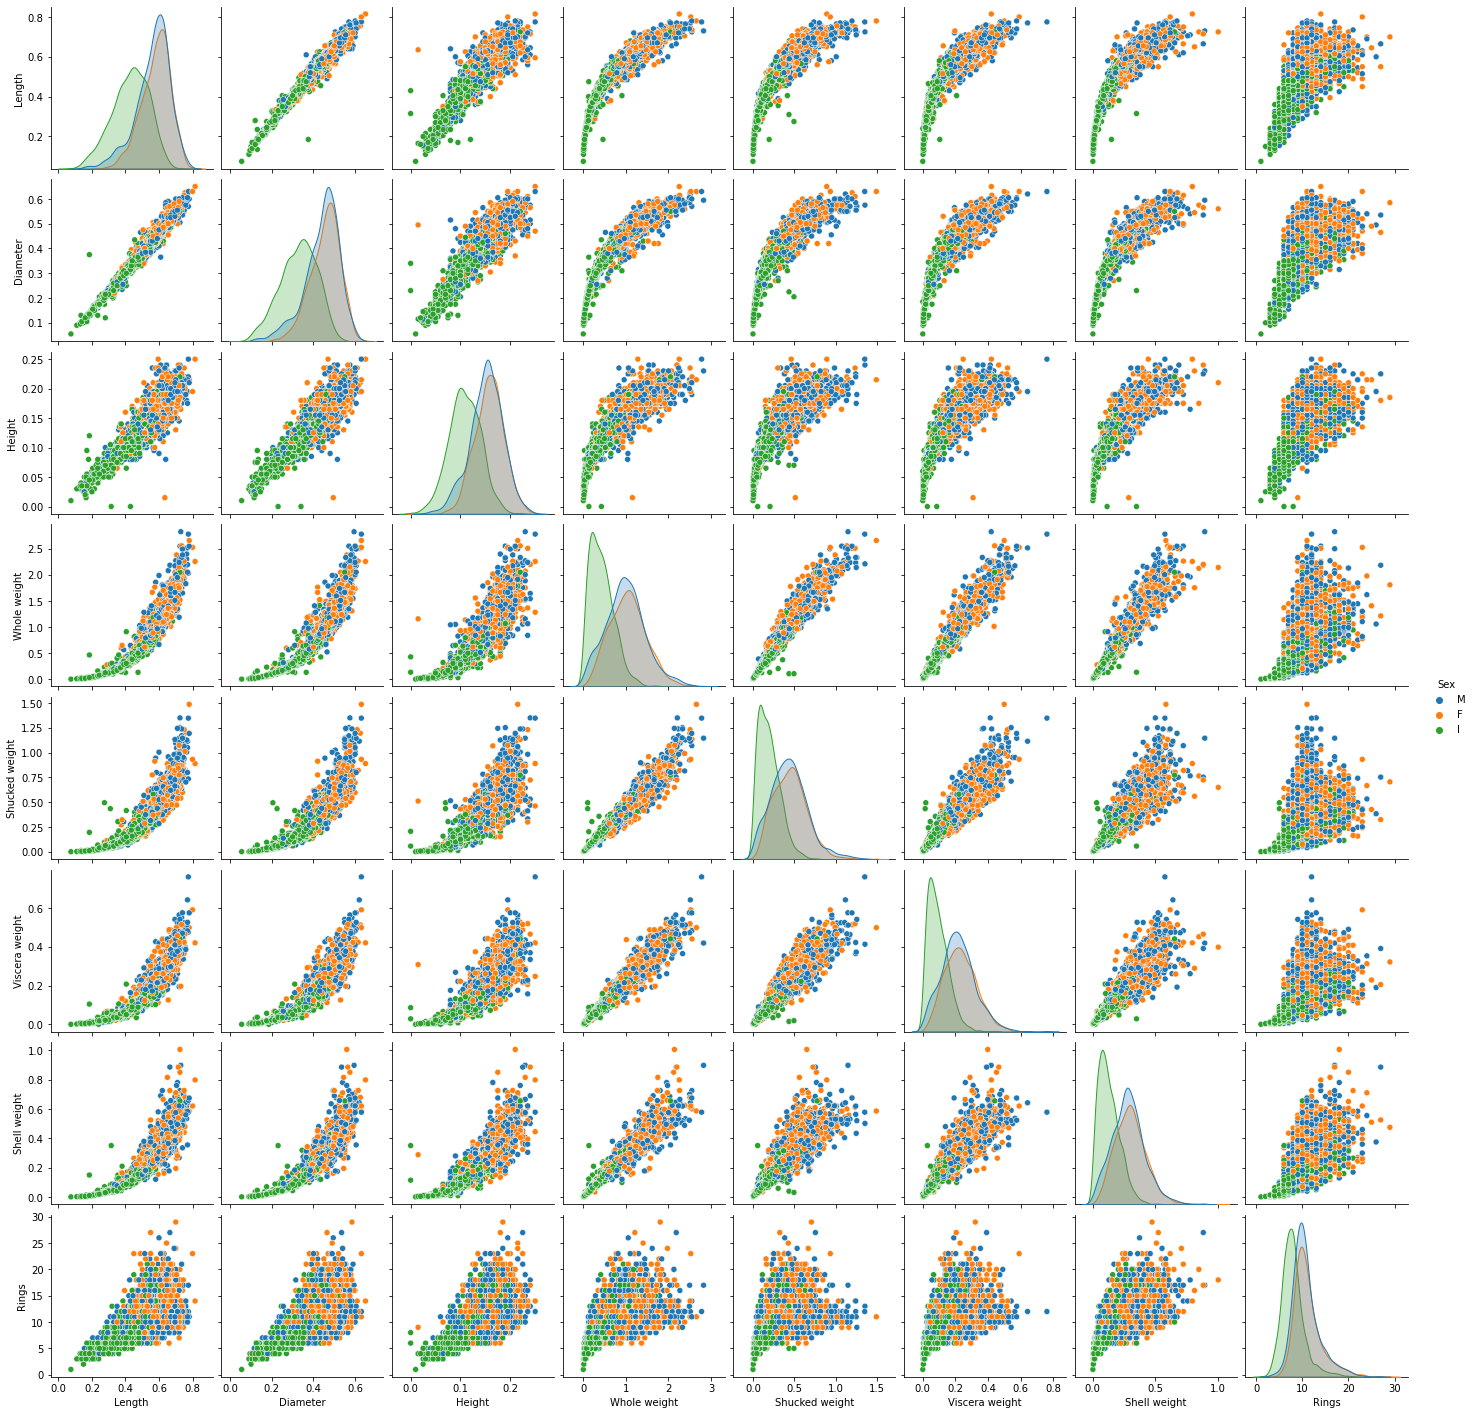

In [116]:
sns.pairplot(tempdf, hue='Sex')

## Comments on the plots
From the plots we can see that the male and female abalones seems to have similar distributions, but there is a difference between the infant and the male/female.
We can also see the collinearity between the length and the diameter of the abalone, we should therefore only include one of them in the model.

## Preprocessing the data

In [117]:
# Checking for null values:
df.isnull().values.any()

False

In [118]:
# Check types of variables
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [119]:
# Creating dummy variables for the categorical data
df = pd.get_dummies(df, columns=['Sex'])
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


## Linear regression

In [120]:
# imports
from sklearn import model_selection, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
# splitting the data in train and test
x_cols = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", 
               "Shell weight", "Sex_F",  "Sex_I",  "Sex_M"]
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[x_cols], 
                                                                    df['Rings'], 
                                                                    test_size=0.2, 
                                                                    random_state=42)

In [122]:
reg = linear_model.LinearRegression()

In [123]:
model = reg.fit(x_train, y_train)

In [124]:
model.coef_

array([ -0.20155385,  11.12339118,  10.44532535,   8.93217555,
       -20.25654479,  -9.5589163 ,   8.79237823,   0.20523277,
        -0.51374167,   0.3085089 ])

In [125]:
# predictions 
y_pred = model.predict(x_test)

In [126]:
# mean square error
mean_squared_error(y_test, y_pred)

4.891232447128561

In [127]:
# r^2
r2_score(y_test, y_pred)

0.5481628137889281

## Discussing the model
Just doing linear regression with all the varaibles included does not give a very good $R^2$. 